In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def k_means_clustering(dataset, num_clusters):
    # Remove the 'Species' column and store it separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)

    # Convert the dataset to a numpy array
    X = dataset.values

    # Initialize the centroids randomly
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], num_clusters, replace=False)]

    # Iterate until convergence
    while True:
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        labels = np.argmin(distances, axis=1)

        # Update the centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(num_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, species


In [2]:
def pca(dataset):
    # Remove the 'Species' column and store it separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)

    # Convert the dataset to a numpy array
    X = dataset.values

    # Standardize the data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std

    # Compute the covariance matrix
    cov_matrix = np.cov(X.T)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project the data onto the first three eigenvectors
    projected_data = X.dot(eigenvectors[:, :3])

    return projected_data, eigenvalues, species

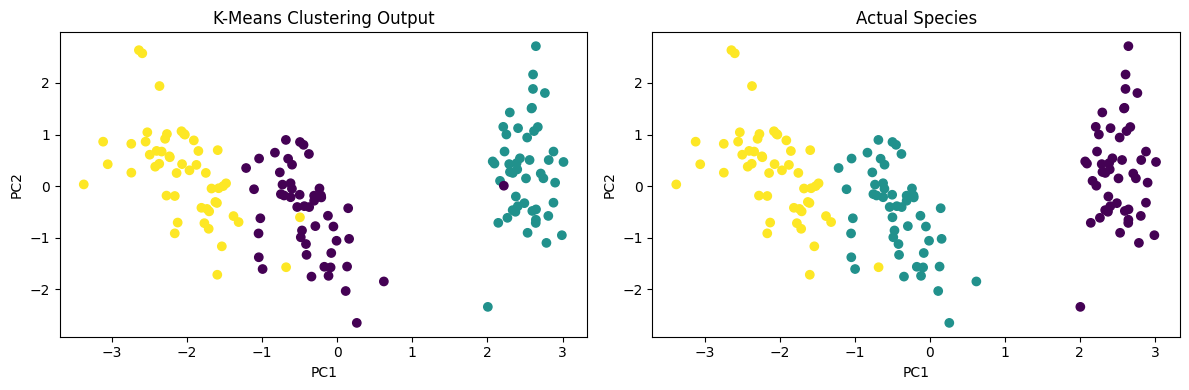

In [3]:
# Load the Iris dataset
dataset = pd.read_csv('Iris Dataset.csv')

# Perform K-Means Clustering
num_clusters = 3
kmeans_labels, species = k_means_clustering(dataset, num_clusters)

# Perform Principal Component Analysis (PCA)
pca_data, eigenvalues, _ = pca(dataset)

# Plot the K-Means Clustering output
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Output')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot the actual species
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=species.factorize()[0])
plt.title('Actual Species')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display the plots
plt.tight_layout()
plt.show()